# FFT on a Composite Wave
Performing the Fast Fourier Transform (FFT) both by hand and with scipy on a composite signal from the time domain to the frequency domain and then using the Inverse Fast Fourier Transform (IFFT) both by hand and with scipy to go back into the time domain

In [28]:
import numpy as np
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt
%matplotlib inline

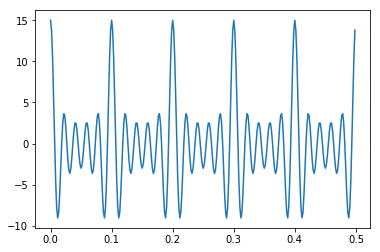

In [29]:
π = np.pi
Fs = 600 # Sample Rate
Ts = 1/Fs

t = np.arange(0, 0.5 ,Ts)
N = len(t) # number of sample points
ω = 10 # wave frequency


def wave(n):  
    return n * np.cos(n * ω * 2 * π * t)

# Build a composite wave from 5 separate sine waves
y = np.zeros(len(t))
for i in range(1,6):
    y += wave(i)
    

plt.plot(t, y)
plt.show()

## FFT by hand
$$X_k = \sum_{n=0}^{N-1} x_nexp(\frac{-i2\pi kn}{N}) \space\space\space k = 0,...,N-1$$

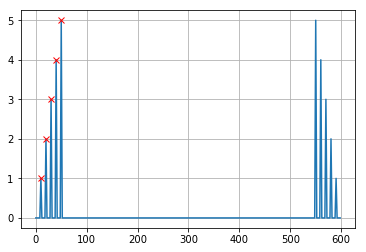

In [30]:
Y = np.zeros(N, dtype=complex)
for i in range(N):
    for n, x in enumerate(y):
        Y[i] += x * np.exp(-1j * 2 * π * i * n/ N)
        
plt.figure()
plt.plot(Fs * 2 * t, 2/N * np.abs(Y))
for i in range(1,6):
    plt.plot(i * ω, i, 'rx') 
plt.grid()
plt.show()       

## FFT using scipy

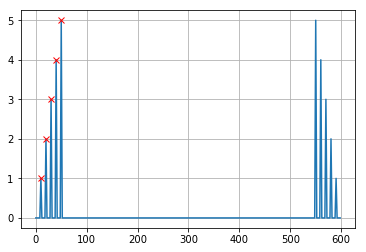

In [31]:
Y2 = fft(y)

plt.figure()
plt.plot(Fs * 2 * t, 2/N * np.abs(Y2))
for i in range(1,6):
    plt.plot(i * 10, i, 'rx') 
plt.grid()
plt.show()

## IFFT by hand
$$x_k = \sum_{n=0}^{N-1} \frac{1}{N}X_nexp(\frac{i2\pi kn}{N}) \space\space\space k = 0,...,N-1$$

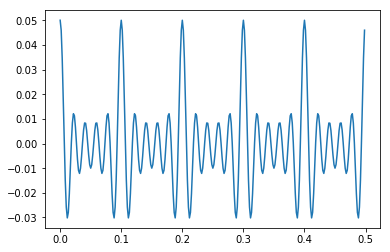

In [32]:
yy = np.zeros(N, dtype=complex)
for i in range(N):
    for n, X in enumerate(Y):
        yy[i] += X/N * np.exp(1j * 2 * π * i * n/ N)/N
yy = yy.real

plt.figure()
plt.plot(t,yy)
plt.show()

## IFFT using scipy

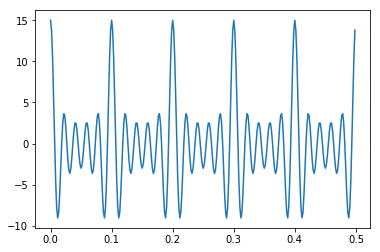

In [33]:
yy2 = ifft(Y2)
yy2 = yy2.real

plt.figure()
plt.plot(t,yy2)
plt.show()